# 1 Import libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time
import datetime
import pytz
import IPython

In [2]:
print('TF version:', tf.__version__)
print('GPU devices:', tf.config.list_physical_devices('GPU'))

TF version: 2.4.1
GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# 2 Data load and preprocessing

In [3]:
def load_dataset():
    # load the train data
    train_dataset = h5py.File('train_catvnoncat.h5', "r")

    # your train set features
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 

    # your train set labels
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    # load the test data
    test_dataset = h5py.File('test_catvnoncat.h5', "r")

    # your test set features
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 

    # your test set labels  
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    # the list of classes
    classes = np.array(test_dataset["list_classes"][:]) 

    # reshape the test data
    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0],1))
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0],1))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_y, test_set_x_orig, test_y, classes = load_dataset()

In [5]:
# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1)

# Standardize the dataset
train_x = train_set_x_flatten/255
test_x = test_set_x_flatten/255

In [6]:
print ("train_x shape: " + str(train_x.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x  shape: " + str(test_x.shape))
print ("test_y  shape: " + str(test_y.shape))

train_x shape: (209, 12288)
train_y shape: (209, 1)
test_x  shape: (50, 12288)
test_y  shape: (50, 1)


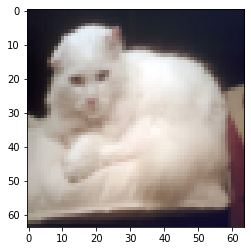

In [7]:
# visualize a sample modified data
index = 13
plt.imshow(train_x[index].reshape(64,64,3))

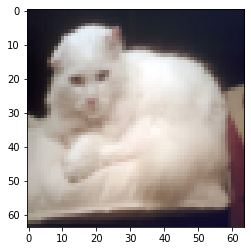

In [8]:
# visualize a sample raw data
index = 13
plt.imshow(train_set_x_orig[index])

In [9]:
class MyCustomCallback(tf.keras.callbacks.Callback):

  def on_train_begin(self, batch, logs=None):
    self.begins = time.time()
    print('Training: begins at {}'.format(datetime.datetime.now(pytz.timezone('America/Fortaleza')).strftime("%a, %d %b %Y %H:%M:%S")))

  def on_train_end(self, logs=None):
    print('Training: ends at {}'.format(datetime.datetime.now(pytz.timezone('America/Fortaleza')).strftime("%a, %d %b %Y %H:%M:%S")))
    print('Duration: {:.2f} seconds'.format(time.time() - self.begins))    

# 3 Base Model

In [ ]:
# Instantiate a simple classification model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation=tf.nn.relu, dtype='float64'),
  tf.keras.layers.Dense(8, activation=tf.nn.relu, dtype='float64'),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid, dtype='float64')
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.BinaryCrossentropy()

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.BinaryAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

# configure the optimizer, loss, and metrics to monitor.
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

# training 
history = model.fit(x=train_x,
                    y=train_y,
                    batch_size=32,
                    epochs=500,
                    validation_data=(test_x,test_y),
                    callbacks=[MyCustomCallback()],
                    verbose=1)

Training: begins at Sun, 14 Mar 2021 19:36:47
Epoch 1/500
7/7 [==============================] - 1s 30ms/step - loss: 0.6850 - binary_accuracy: 0.5950 - val_loss: 0.9030 - val_binary_accuracy: 0.3400
Epoch 2/500
7/7 [==============================] - 0s 12ms/step - loss: 0.6679 - binary_accuracy: 0.6444 - val_loss: 0.9324 - val_binary_accuracy: 0.3400
Epoch 3/500
7/7 [==============================] - 0s 10ms/step - loss: 0.6597 - binary_accuracy: 0.6603 - val_loss: 0.9154 - val_binary_accuracy: 0.3400
Epoch 4/500
7/7 [==============================] - 0s 9ms/step - loss: 0.6555 - binary_accuracy: 0.6320 - val_loss: 0.8129 - val_binary_accuracy: 0.3400
Epoch 5/500
7/7 [==============================] - 0s 9ms/step - loss: 0.6426 - binary_accuracy: 0.6587 - val_loss: 0.8603 - val_binary_accuracy: 0.3400
Epoch 6/500
7/7 [==============================] - 0s 9ms/step - loss: 0.6369 - binary_accuracy: 0.6540 - val_loss: 0.8796 - val_binary_accuracy: 0.3400
Epoch 7/500
7/7 [================

In [ ]:
loss, acc = model.evaluate(x=train_x,y=train_y, batch_size=32)
print('Train loss: %.4f - acc: %.4f' % (loss, acc))

loss_, acc_ = model.evaluate(x=test_x,y=test_y, batch_size=32)
print('Test loss: %.4f - acc: %.4f' % (loss_, acc_))

7/7 [==============================] - 0s 4ms/step - loss: 0.1247 - binary_accuracy: 0.9904
Train loss: 0.1247 - acc: 0.9904
2/2 [==============================] - 0s 6ms/step - loss: 0.9502 - binary_accuracy: 0.6600
Test loss: 0.9502 - acc: 0.6600


# 4 Hyperparameter Tuning 

In [ ]:
%%capture
!pip install wandb

In [ ]:
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## 4.1 Monitoring a neural network

In [ ]:
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras.callbacks import EarlyStopping

# Default values for hyperparameters
defaults = dict(layer_1 = 8,
                layer_2 = 8,
                learn_rate = 0.001,
                batch_size = 32,
                epoch = 500)

wandb.init(project="lesson04", config= defaults, name="lesson04_run_01")
config = wandb.config

wandb: Currently logged in as: ivanovitchm (use `wandb login --relogin` to force relogin)


In [ ]:
# Instantiate a simple classification model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(config.layer_1, activation=tf.nn.relu, dtype='float64'),
  tf.keras.layers.Dense(config.layer_2, activation=tf.nn.relu, dtype='float64'),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid, dtype='float64')
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.BinaryCrossentropy()

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.BinaryAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=config.learn_rate)

# configure the optimizer, loss, and metrics to monitor.
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

In [ ]:
%%wandb
# Add WandbCallback() to the fit function
model.fit(x=train_x,
          y=train_y,
          batch_size=config.batch_size,
          epochs=config.epoch,
          validation_data=(test_x,test_y),
          callbacks=[WandbCallback(log_weights=True)],
          verbose=1)

## 4.2 Sweeps

In [ ]:
 # The sweep calls this function with each set of hyperparameters
def train():
    # Default values for hyper-parameters we're going to sweep over
    defaults = dict(layer_1 = 8,
                layer_2 = 8,
                learn_rate = 0.001,
                batch_size = 32,
                epoch = 500)
    
    # Initialize a new wandb run
    wandb.init(project="lesson04", config= defaults)

    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    
    # Instantiate a simple classification model
    model = tf.keras.Sequential([
                                 tf.keras.layers.Dense(config.layer_1, activation=tf.nn.relu, dtype='float64'),
                                 tf.keras.layers.Dense(config.layer_2, activation=tf.nn.relu, dtype='float64'),
                                 tf.keras.layers.Dense(1, activation=tf.nn.sigmoid, dtype='float64')
                                 ])

    # Instantiate a logistic loss function that expects integer targets.
    loss = tf.keras.losses.BinaryCrossentropy()

    # Instantiate an accuracy metric.
    accuracy = tf.keras.metrics.BinaryAccuracy()

    # Instantiate an optimizer.
    optimizer = tf.keras.optimizers.SGD(learning_rate=config.learn_rate)

    # configure the optimizer, loss, and metrics to monitor.
    model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])  

    model.fit(train_x, train_y, batch_size=config.batch_size,
              epochs=config.epoch,
              validation_data=(test_x, test_y),
              callbacks=[WandbCallback(),
                          EarlyStopping(patience=100)]
              )   

In [ ]:
# See the source code in order to see other parameters
# https://github.com/wandb/client/tree/master/wandb/sweeps

In [ ]:
# Configure the sweep – specify the parameters to search through, the search strategy, the optimization metric et all.
sweep_config = {
    'method': 'random', #grid, random
    'metric': {
      'name': 'binary_accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'layer_1': {
            'max': 32,
            'min': 8,
            'distribution': 'int_uniform',
        },
        'layer_2': {
            'max': 32,
            'min': 8,
            'distribution': 'int_uniform',
        },
        'learn_rate': {
            'min': -4,
            'max': -2,
            'distribution': 'log_uniform',  
        },
        'epoch': {
            'values': [300,400,600]
        },
        'batch_size': {
            'values': [32,64]
        }
    }
}

In [ ]:
# Initialize a new sweep
# Arguments:
#     – sweep_config: the sweep config dictionary defined above
#     – entity: Set the username for the sweep
#     – project: Set the project name for the sweep
sweep_id = wandb.sweep(sweep_config, entity="ivanovitchm", project="lesson04")

In [ ]:
# Initialize a new sweep
# Arguments:
#     – sweep_id: the sweep_id to run - this was returned above by wandb.sweep()
#     – function: function that defines your model architecture and trains it
wandb.agent(sweep_id = sweep_id, function=train,count=20)

### 4.2.1 Restore a model

Restore a file, such as a model checkpoint, into your local run folder to access in your script.

See [the restore docs](https://docs.wandb.com/library/restore) for more details.

In [10]:
%%capture
!pip install wandb

In [11]:
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [13]:
import wandb
# restore the raw model file "model-best.h5" from a specific run by user "ivanovitchm"
# in project "lesson04" from run "sqdv5ccj"
best_model = wandb.restore('model-best.h5', run_path="ivanovitchm/lesson04/sqdv5ccj")

In [14]:
# restore the model for tf.keras
model = tf.keras.models.load_model(best_model.name)

In [15]:
# execute the loss and accuracy using the test dataset
loss_, acc_ = model.evaluate(x=test_x,y=test_y, batch_size=64)
print('Test loss: %.3f - acc: %.3f' % (loss_, acc_))

1/1 [==============================] - 3s 3s/step - loss: 0.5147 - binary_accuracy: 0.8400
Test loss: 0.515 - acc: 0.840


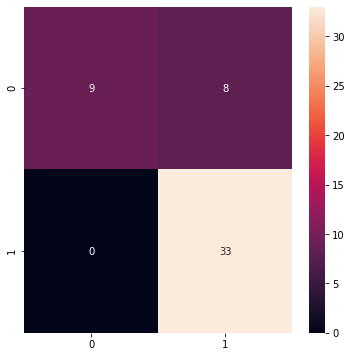

In [16]:
# source: https://github.com/wandb/awesome-dl-projects/blob/master/ml-tutorial/EMNIST_Dense_Classification.ipynb
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = np.greater_equal(model.predict(test_x),0.5).astype(int)
cm = confusion_matrix(y_true = test_y, y_pred = predictions)

plt.figure(figsize=(6,6));
sns.heatmap(cm, annot=True)
plt.savefig('confusion_matrix.png', bbox_inches='tight')
plt.show()

In [17]:
wandb.init(project="lesson04")
wandb.log({"image_confusion_matrix": [wandb.Image('confusion_matrix.png')]})

wandb: Currently logged in as: ivanovitchm (use `wandb login --relogin` to force relogin)


In [18]:
# visualize the images and instances with error
# ground-truth
print("Ground-truth\n",test_y[~np.equal(predictions,test_y)])

# predictions
print("Predictions\n",predictions[~np.equal(predictions,test_y)])

Ground-truth
 [0 0 0 0 0 0 0 0]
Predictions
 [1 1 1 1 1 1 1 1]


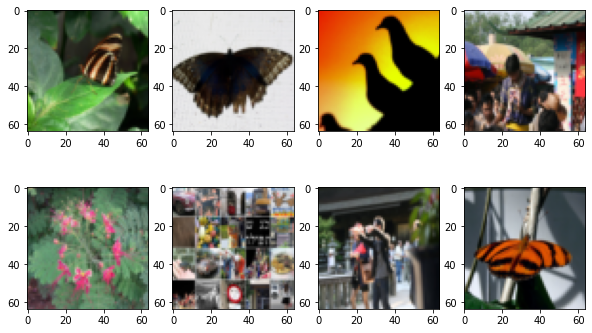

In [19]:
# Images predicted as non-cat
fig, ax = plt.subplots(2,4,figsize=(10,6))
wrong_images = (~np.equal(predictions,test_y)).astype(int)
index = np.where(wrong_images == 1)[0]

for i,value in enumerate(index):
  ax[i//4,i%4].imshow(test_x[value].reshape(64,64,3))
plt.savefig('wrong_predictions.png', bbox_inches='tight')

In [20]:
wandb.log({"wrong_predictions": [wandb.Image('wrong_predictions.png')]})

# 5 References

1. https://github.com/wandb/awesome-dl-projects
2. https://docs.wandb.ai/app/features/panels/parameter-importance
3. https://wandb.ai/wandb/DistHyperOpt/reports/Modern-Scalable-Hyperparameter-Tuning-Methods--VmlldzoyMTQxODM